# Regularization
1. Ridge (L2) - Penalty applied on Square of coefficients
2. Lasso (L1) - Penalty applied on Absolute value of coefficients

In [38]:
from warnings import filterwarnings
filterwarnings("ignore")

### Step 1: Read the dataset


In [39]:
import pandas as pd 
df = pd.read_csv('Cars93.csv',na_values=['','NA'],keep_default_na=False)

### Step 2: Performing basic data quality checks


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  93 non-null     int64  
 1   Manufacturer        93 non-null     object 
 2   Model               93 non-null     object 
 3   Type                93 non-null     object 
 4   Min.Price           93 non-null     float64
 5   Price               93 non-null     float64
 6   Max.Price           93 non-null     float64
 7   MPG.city            93 non-null     int64  
 8   MPG.highway         93 non-null     int64  
 9   AirBags             89 non-null     object 
 10  DriveTrain          93 non-null     object 
 11  Cylinders           93 non-null     object 
 12  EngineSize          93 non-null     float64
 13  Horsepower          93 non-null     int64  
 14  RPM                 93 non-null     int64  
 15  Rev.per.mile        93 non-null     int64  
 16  Man.trans.

In [41]:
m = df.isna().sum()
m[m>0]

AirBags            4
Rear.seat.room     2
Luggage.room      11
dtype: int64

In [42]:
df.duplicated().sum()

0

### Step 3: Seperate X and Y(Weight)


In [43]:
X = df.drop(columns=['id','Weight'])
Y = df[['Weight']]

In [44]:
X.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,13.2,5,177,102,68,37,26.5,11.0,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,18.0,5,195,115,71,38,30.0,15.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,16.9,5,180,102,67,37,28.0,14.0,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,Front,...,21.1,6,193,106,70,37,31.0,17.0,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,21.1,4,186,109,69,39,27.0,13.0,non-USA,BMW 535i


In [45]:
Y.head()

,Weight
0,2705
1,3560
2,3375
3,3405
4,3640


### Step 4: Create a preprocessing pipeline on X


In [46]:
# Seperate the categorical and continuous features
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes !='object'])

In [47]:
cat

['Manufacturer',
 'Model',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Origin',
 'Make']

In [48]:
con

['Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room']

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [50]:
num_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),
                           ('scaler',StandardScaler())])

In [51]:
cat_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),
                            ('ohe',OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [52]:
pre = ColumnTransformer([('num',num_pipe,con),
                         ('cat',cat_pipe,cat)]).set_output(transform='pandas')

In [53]:
X_pre = pre.fit_transform(X)
X_pre.head()

,num__Min.Price,num__Price,num__Max.Price,num__MPG.city,num__MPG.highway,num__EngineSize,num__Horsepower,num__RPM,num__Rev.per.mile,num__Fuel.tank.capacity,...,cat__Make_Toyota Camry,cat__Make_Toyota Celica,cat__Make_Toyota Previa,cat__Make_Toyota Tercel,cat__Make_Volkswagen Corrado,cat__Make_Volkswagen Eurovan,cat__Make_Volkswagen Fox,cat__Make_Volkswagen Passat,cat__Make_Volvo 240,cat__Make_Volvo 850
0,-0.485787,-0.375720,-0.282465,0.471312,0.360925,-0.841022,-0.073484,1.717489,1.129530,-1.062184,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.388017,1.497844,1.531409,-0.781032,-0.770514,0.515869,1.078322,0.369586,0.005661,0.409445,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.008658,0.998227,0.948052,-0.423219,-0.581941,0.128186,0.540813,0.369586,-0.105713,0.072197,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,1.359872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.755752,1.091905,1.303535,-0.065407,0.172352,0.806631,1.231897,0.706562,0.430909,1.359872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Step 5: Apply train test split


In [54]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre,Y,test_size=0.2,random_state=10)

In [55]:
xtrain.head()

,num__Min.Price,num__Price,num__Max.Price,num__MPG.city,num__MPG.highway,num__EngineSize,num__Horsepower,num__RPM,num__Rev.per.mile,num__Fuel.tank.capacity,...,cat__Make_Toyota Camry,cat__Make_Toyota Celica,cat__Make_Toyota Previa,cat__Make_Toyota Tercel,cat__Make_Volkswagen Corrado,cat__Make_Volkswagen Eurovan,cat__Make_Volkswagen Fox,cat__Make_Volkswagen Passat,cat__Make_Volvo 240,cat__Make_Volvo 850
42,-0.382326,-0.209181,-0.063707,0.292406,0.360925,-0.453339,-0.073484,0.538074,0.562533,0.102856,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53,-0.715702,-0.823294,-0.874937,1.008032,1.303790,-0.841022,-0.783765,0.369586,-0.227212,-0.663618,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,1.422504,1.039862,0.692834,-0.423219,-0.581941,0.612789,0.060893,-0.809828,-1.108083,-0.203734,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.318914,0.134306,-0.018132,-0.602126,-0.204794,1.097393,0.502419,-0.809828,-1.543455,0.409445,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,-0.267368,-0.406946,-0.501224,-0.244313,-0.393368,-0.162577,-0.841356,-0.809828,0.268910,-0.203734,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
ytrain.head()

,Weight
42,3040
53,2440
21,3570
6,3470
26,3080


In [57]:
xtest.head()

,num__Min.Price,num__Price,num__Max.Price,num__MPG.city,num__MPG.highway,num__EngineSize,num__Horsepower,num__RPM,num__Rev.per.mile,num__Fuel.tank.capacity,...,cat__Make_Toyota Camry,cat__Make_Toyota Celica,cat__Make_Toyota Previa,cat__Make_Toyota Tercel,cat__Make_Volkswagen Corrado,cat__Make_Volkswagen Eurovan,cat__Make_Volkswagen Fox,cat__Make_Volkswagen Passat,cat__Make_Volvo 240,cat__Make_Volvo 850
34,-0.497283,-0.573485,-0.610603,0.292406,0.172352,-0.647181,-0.553404,0.369586,0.015786,-0.357028,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90,0.663786,0.394523,0.164167,-0.781032,-0.770514,0.128186,0.655993,0.875050,0.106911,0.562740,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,1.359872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35,-0.301856,0.040627,0.310006,-1.317751,-1.713379,0.322027,0.022499,-0.809828,-0.510711,1.329213,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,0.146478,-0.115503,-0.318925,-0.423219,-0.204794,0.612789,0.176074,0.032611,-0.692960,0.409445,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
ytest.head()

,Weight
34,2710
90,2810
3,3405
35,3735
19,3515


In [59]:
xtrain.shape

(74, 257)

In [60]:
xtest.shape

(19, 257)

### Step 6: Build the models


In [61]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(xtrain,ytrain)

LinearRegression()

In [62]:
model1.score(xtrain,ytrain)

1.0

In [63]:
model1.score(xtest,ytest)

0.8381398430790169

### Ridge Regression
1. Penalty applied on square of coefficients
2. Alpha is the parameter that needs to be tuned for the model - Hyperparameter

In [64]:
from sklearn.linear_model import Ridge
model2 = Ridge(alpha=2)
model2.fit(xtrain,ytrain)

Ridge(alpha=2)

In [65]:
model2.score(xtrain,ytrain)

0.9953183637556047

In [66]:
model2.score(xtest,ytest)

0.8656890544193245

### Cross Validation


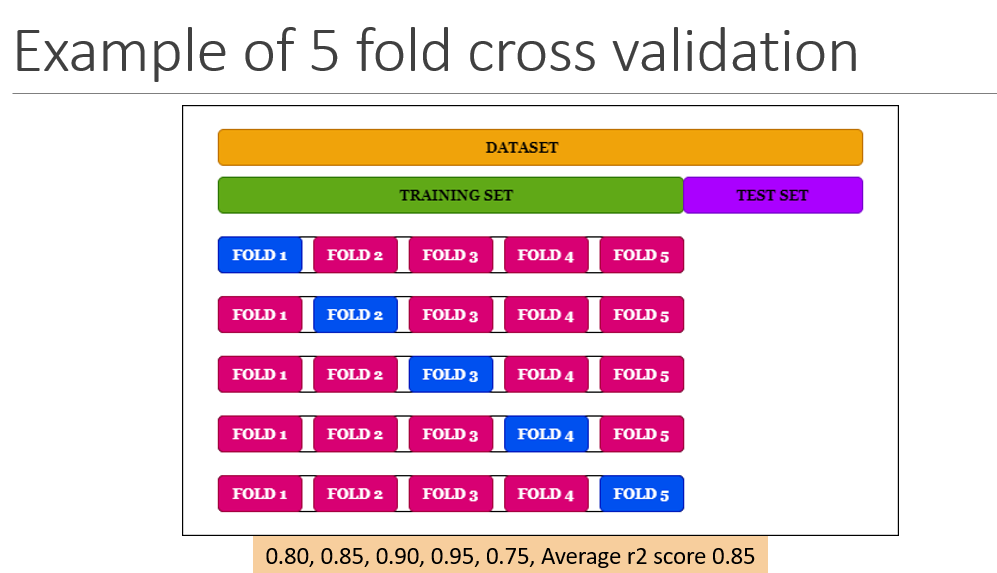

In [67]:
from sklearn.model_selection import cross_val_score
r2_scores = cross_val_score(model2,xtrain,ytrain,cv=5,scoring='r2')
r2_scores

array([0.97433064, 0.96683336, 0.8870119 , 0.95211521, 0.93550405])

In [68]:
r2_scores.mean()

0.9431590326564209

In [69]:
rmse_scores = cross_val_score(model2,xtrain,ytrain,cv=5,scoring='neg_root_mean_squared_error')
rmse_scores

array([ -96.62455791, -123.39970988, -191.23475582, -143.49258006,
       -130.94255374])

In [70]:
rmse_scores.mean()

-137.1388314832874

In [71]:
model1

LinearRegression()

In [74]:
r2_scores_lr = cross_val_score(model1,xtrain,ytrain,cv=5,scoring='r2')
r2_scores_lr

array([0.97494334, 0.96345513, 0.87568378, 0.95484152, 0.93546562])

In [75]:
r2_scores_lr.mean()

0.9408778785895093

### Tune alpha with Gridsearch cv - Hyperparameter Tuning


In [76]:
import numpy as np

In [77]:
params = {'alpha': np.arange(start=0.1,stop = 100 ,step=0.1)}
params

{'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
         1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
         2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
         3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
         4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
         5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
         6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
         7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
         8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
        10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11. ,
        11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. , 12.1,
        12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1, 13.2,
        13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2, 14.3,
        14.4, 14.5, 14.6, 14.

In [80]:
from sklearn.model_selection import GridSearchCV
rr = Ridge()
gscv1 = GridSearchCV(rr, param_grid=params, cv=5, scoring='r2')
gscv1.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7....
       92.5, 92.6, 92.7, 92.8, 92.9, 93. , 93.1, 93.2, 93.3, 93.4, 93.5,
       93.6, 93.7, 93.8, 93.9, 94. , 94.1, 94.2, 94.3, 94.4, 94.5, 94.6,
       94.7, 94.8, 94.9, 95. , 95.1, 95.2, 95.3, 95.4, 95.5, 95.6, 95.7,
       95.8, 95.9, 96. , 96.1, 96.2, 96.3, 96.4, 96.5, 96.6, 96.7, 96.8,
       96.9, 97. , 97.1, 97.2, 97.3, 97.4, 97.5, 97.6, 97.7, 97.8, 97.9,
       98. , 98.1, 98.2, 98.3, 98.4, 98.5, 98.6, 98.7, 98.8, 98.9, 99. ,
       99.1, 99.2, 99.3, 99.4, 99.5, 99.6, 99.7, 99.8, 99.9])},
             scoring='r2')

In [85]:
gscv1.best_params_

{'alpha': 3.8000000000000003}

In [86]:
gscv1.best_score_

0.9434391769932097

In [88]:
best_ridge = gscv1.best_estimator_
best_ridge

Ridge(alpha=3.8000000000000003)

In [89]:
 best_ridge.score(xtrain,ytrain)

0.9906446755991962

In [90]:
best_ridge.score(xtest,ytest)

0.8796471048193688

### Lasso Model

In [91]:
from sklearn.linear_model import Lasso
model3 = Lasso(alpha=1)
model3.fit(xtrain,ytrain)

Lasso(alpha=1)

In [92]:
model3.score(xtrain,ytrain)

0.9936354478021407

In [93]:
model3.score(xtest,ytest)

0.7816304364881248

In [94]:
lr = Lasso()
gscv2 = GridSearchCV(lr,param_grid=params,cv=5,scoring='r2')
gscv2.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7....
       92.5, 92.6, 92.7, 92.8, 92.9, 93. , 93.1, 93.2, 93.3, 93.4, 93.5,
       93.6, 93.7, 93.8, 93.9, 94. , 94.1, 94.2, 94.3, 94.4, 94.5, 94.6,
       94.7, 94.8, 94.9, 95. , 95.1, 95.2, 95.3, 95.4, 95.5, 95.6, 95.7,
       95.8, 95.9, 96. , 96.1, 96.2, 96.3, 96.4, 96.5, 96.6, 96.7, 96.8,
       96.9, 97. , 97.1, 97.2, 97.3, 97.4, 97.5, 97.6, 97.7, 97.8, 97.9,
       98. , 98.1, 98.2, 98.3, 98.4, 98.5, 98.6, 98.7, 98.8, 98.9, 99. ,
       99.1, 99.2, 99.3, 99.4, 99.5, 99.6, 99.7, 99.8, 99.9])},
             scoring='r2')

In [95]:
gscv2.best_params_

{'alpha': 5.2}

In [96]:
gscv2.best_score_

0.9422784524364886

In [97]:
best_lasso = gscv2.best_estimator_
best_lasso

Lasso(alpha=5.2)

In [98]:
best_lasso.score(xtrain,ytrain)

0.9714666534740786

In [99]:
best_lasso.score(xtest,ytest)

0.8694579875459572

### From above results i can say Ridge Model perform best here becuse it has better CV R2 score of 0.9434
Detailed Model Evaluation


In [100]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,\
                            mean_absolute_percentage_error,r2_score

In [101]:
def evaluate_model(model,x,y):
    ypred = model.predict(x)
    # Get the scores
    mse = mean_squared_error(y,ypred)
    rmse = mse**(1/2)
    mae = mean_absolute_error(y,ypred)
    mape = mean_absolute_percentage_error(y,ypred)
    r2 = r2_score(y,ypred)
    # Print the result
    print(f'Mean Squared Error : {mse:.2f}')
    print(f'Root Mean Squared Error : {rmse:.2f}')
    print(f'Mean Absolute Error : {mae:.2f}')
    print(f'Mean Absolute Percentage Error : {mape:.4f}')
    print(f'R2 Score : {r2:.4f}')


In [102]:
model1

LinearRegression()

In [103]:
# Linear Regression Model
evaluate_model(model1,xtest,ytest)

Mean Squared Error : 37605.76
Root Mean Squared Error : 193.92
Mean Absolute Error : 147.29
Mean Absolute Percentage Error : 0.0490
R2 Score : 0.8381


In [104]:
# Ridge
evaluate_model(best_ridge,xtest,ytest)

Mean Squared Error : 27962.18
Root Mean Squared Error : 167.22
Mean Absolute Error : 130.26
Mean Absolute Percentage Error : 0.0438
R2 Score : 0.8796


In [105]:
# Lasso Test
evaluate_model(best_lasso,xtest,ytest)

Mean Squared Error : 30329.47
Root Mean Squared Error : 174.15
Mean Absolute Error : 131.92
Mean Absolute Percentage Error : 0.0446
R2 Score : 0.8695


### Because R2 score for ridge is higest choose Ridge model
Predict out of sample data

In [106]:
xnew = pd.read_csv("Sample.csv",na_values=['','NA'],keep_default_na=False)
xnew

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make
0,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,Front,...,15.0,6,190,106,65,37,31.0,17.0,non-USA,Audi 100
1,Pontiac,Sunbird,Compact,9.4,11.1,12.8,23,31,None,Front,...,15.2,5,181,101,66,39,25.0,13.0,USA,Pontiac Sunbird
2,Chevrolet,Lumina,Midsize,13.4,15.9,18.4,21,29,None,Front,...,16.5,6,198,108,71,40,28.5,16.0,USA,Chevrolet Lumina
3,Mazda,RX-7,Sporty,32.5,32.5,32.5,17,25,Driver only,Rear,...,20.0,2,169,96,69,37,NaN,NaN,non-USA,Mazda RX-7
4,Volkswagen,Fox,Small,8.7,9.1,9.5,25,33,None,Front,...,12.4,4,163,93,63,34,26.0,10.0,non-USA,Volkswagen Fox


In [107]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['Min.Price', 'Price', 'Max.Price', 'MPG.city',
                                  'MPG.highway', 'EngineSize', 'Horsepower',
                                  'RPM', 'Rev.per.mile', 'Fuel.tank.capacity',
                                  'Passengers', 'Length', 'Wheelbase', 'Width',
                                  'Turn.circle', 'Rear.seat.room',
                                  'Luggage.room']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Manufacturer', 'Model', 'Type', 'AirBags',
                                  'DriveTrain', 'Cylinders', 'Man.trans.avail',
                                  'Origin', 'Make'])])

In [108]:
xnew_pre = pre.transform(xnew)
xnew_pre

,num__Min.Price,num__Price,num__Max.Price,num__MPG.city,num__MPG.highway,num__EngineSize,num__Horsepower,num__RPM,num__Rev.per.mile,num__Fuel.tank.capacity,...,cat__Make_Toyota Camry,cat__Make_Toyota Celica,cat__Make_Toyota Previa,cat__Make_Toyota Tercel,cat__Make_Volkswagen Corrado,cat__Make_Volkswagen Eurovan,cat__Make_Volkswagen Fox,cat__Make_Volkswagen Passat,cat__Make_Volvo 240,cat__Make_Volvo 850
0,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,-0.510323,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.888138,-0.875337,-0.829362,0.113500,0.360925,-0.647181,-0.649388,-0.135877,0.673908,-0.449005,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.428309,-0.375720,-0.318925,-0.244313,-0.016221,-0.453339,-0.649388,-0.135877,0.532158,-0.050439,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.767376,1.352122,0.966282,-0.959938,-0.770514,-1.325626,2.134145,2.054464,-0.014589,1.022624,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.968608,-1.083511,-1.130155,0.471312,0.738071,-0.841022,-1.206095,0.369586,0.441034,-1.307455,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [109]:
preds = best_ridge.predict(xnew_pre)
preds

array([[3354.76382703],
       [2652.51328626],
       [3057.04172854],
       [3269.37188001],
       [2242.37830206]])

In [110]:
xnew['Weight_pred']= preds 
xnew

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make,Weight_pred
0,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,Front,...,6,190,106,65,37,31.0,17.0,non-USA,Audi 100,3354.763827
1,Pontiac,Sunbird,Compact,9.4,11.1,12.8,23,31,None,Front,...,5,181,101,66,39,25.0,13.0,USA,Pontiac Sunbird,2652.513286
2,Chevrolet,Lumina,Midsize,13.4,15.9,18.4,21,29,None,Front,...,6,198,108,71,40,28.5,16.0,USA,Chevrolet Lumina,3057.041729
3,Mazda,RX-7,Sporty,32.5,32.5,32.5,17,25,Driver only,Rear,...,2,169,96,69,37,NaN,NaN,non-USA,Mazda RX-7,3269.371880
4,Volkswagen,Fox,Small,8.7,9.1,9.5,25,33,None,Front,...,4,163,93,63,34,26.0,10.0,non-USA,Volkswagen Fox,2242.378302


In [111]:
xnew.to_csv('RidgeResults.csv',index=False)